Objective:Explore Netflix’s dataset to understand content distribution, genres, ratings, and country trends.  
Dataset:[Kaggle Netflix Dataset](https://www.kaggle.com/datasets/shivamb/netflix-shows)  
Tools:Python, Pandas, Seaborn, Matplotlib

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("../data/netflix_titles.csv")
print("First 5 rows:")
display(df.head())
print("\nDataset info:")
df.info()  
print("\nBasic statistics:")
display(df.describe(include='all'))  
print("Missing values per column:")
print(df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())
print("Rows and columns:", df.shape)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


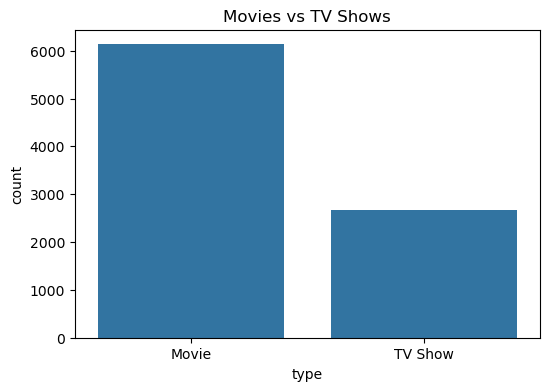

In [11]:
##Count of movies and TV shows available on Netflix.

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type")

plt.title("Movies vs TV Shows")
plt.show()  

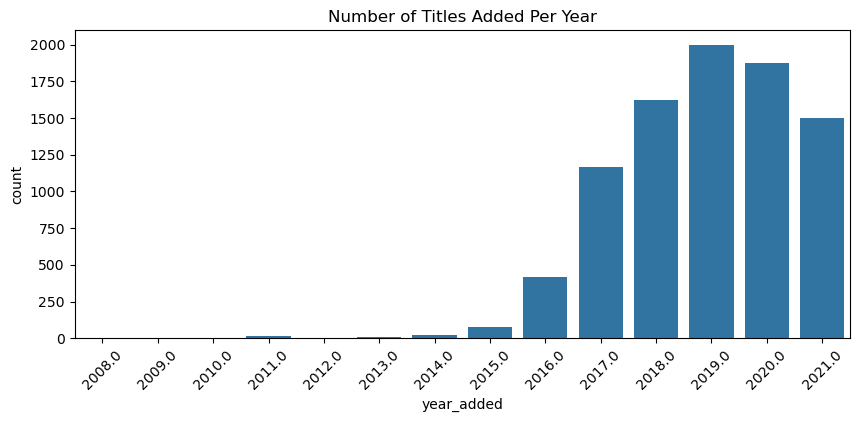

In [12]:
## Number of Titles Added per Year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(10,4))
sns.countplot(data=df, x='year_added', order=sorted(df['year_added'].dropna().unique()))
plt.xticks(rotation=45)
plt.title("Number of Titles Added Per Year")
plt.show()

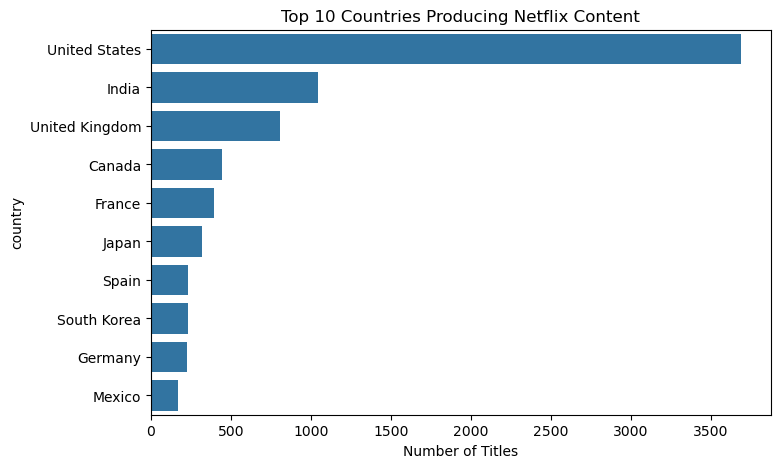

In [13]:
## Top Countries Producing Content
df_countries = df['country'].dropna().str.split(', ').explode()
top_countries = df_countries.value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.show()

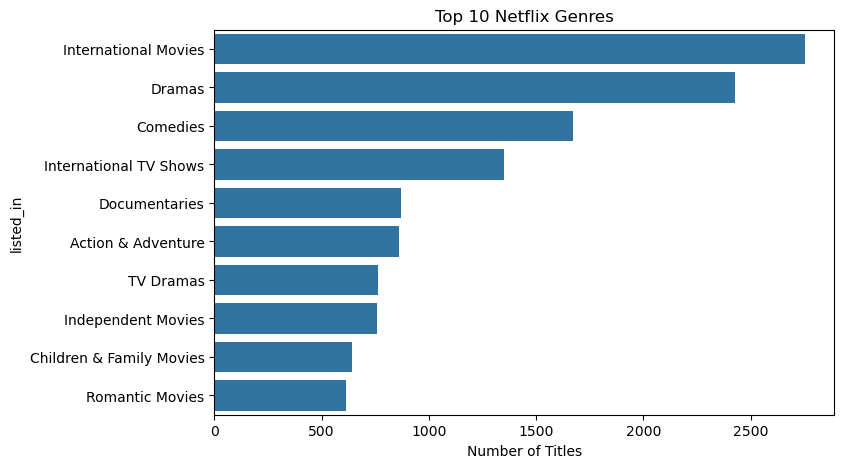

In [14]:
## Most Common Genres
df_genres = df['listed_in'].dropna().str.split(', ').explode()
top_genres = df_genres.value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Netflix Genres")
plt.xlabel("Number of Titles")
plt.show()

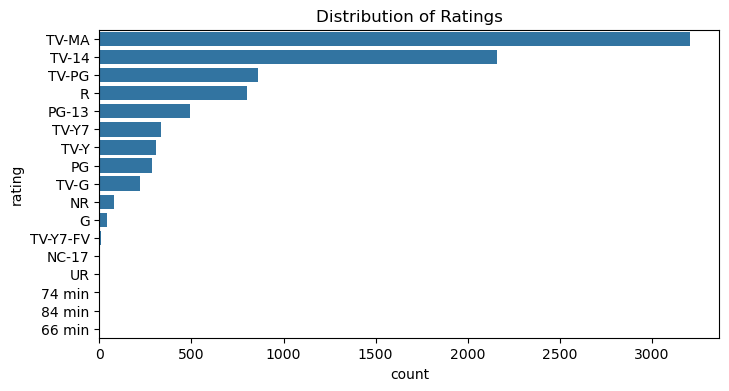

In [15]:
## Distribution of Ratings
plt.figure(figsize=(8,4))
sns.countplot(data=df, y="rating", order=df['rating'].value_counts().index)
plt.title("Distribution of Ratings")
plt.show()

Key Insights & Summary
Netflix has more movies than TV shows, but TV shows have increased in recent years.  
Top content-producing countries: US, India, UK.  
Most common genres: Documentaries, Dramas, Stand-up Comedy.  
Majority of content is rated TV-MA, indicating adult-targeted content.  
Content additions peaked around [fill in peak years from chart].